In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [3]:
 df= pd.read_csv('/content/salary_prediction_dataset.csv')
 df.head(10)

,YearsExperience,Salary
0,8.116262,41469.816295
1,19.063572,88641.137315
2,14.907885,76440.413727
3,12.374511,64925.484725
4,3.964354,22620.723082
5,3.963896,25223.383060
6,2.103589,14687.553929
7,17.457347,89582.634245
8,12.421185,61755.097558
9,14.453379,63962.090223


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  1000 non-null   float64
 1   Salary           1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [5]:
df.describe()

,YearsExperience,Salary
count,1000.000000,1000.000000
mean,10.314875,52068.851655
std,5.550610,27966.621944
min,1.088008,-4035.877131
25%,5.483492,27207.865190
50%,10.439340,52863.110076
75%,15.142072,75216.792162
max,19.994636,107828.787113


YearsExperience    0
Salary             0
dtype: int64


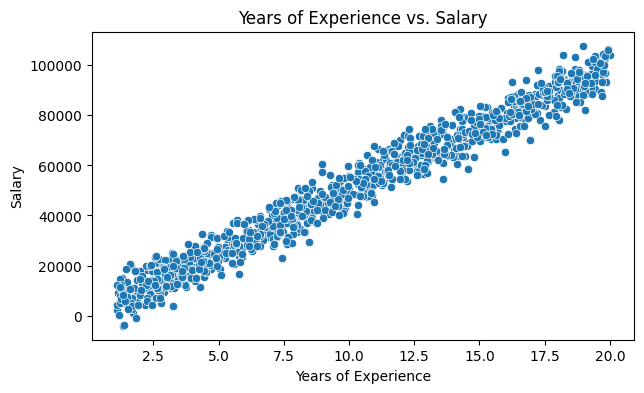

In [6]:
print(df.isnull().sum())

plt.figure(figsize=(7, 4))
sns.scatterplot(x=df['YearsExperience'], y=df['Salary'])
plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [7]:
#spliyting the database into features (X) and target variable(Y)
x=df[['YearsExperience']]
y=df['Salary']

# spiliting in traning and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# checking dataset spiit sizes
x_train.shape,x_test.shape



((800, 1), (200, 1))

In [8]:
# Creating and traning the simple linear Regression model
model=LinearRegression()
model.fit(x_train,y_train)

# Display model parameters
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

Intercept: 995.5770464802481
Coefficient: 4953.709417260945


In [9]:
# Predicting salary for test data
y_pred=model.predict(x_test)

 # Creating a dataframe to compare actual vs predicted values
result=pd.DataFrame({'Actual Salary':y_test.values,'Predicted Salary':y_pred})
result.head()

,Actual Salary,Predicted Salary
0,46144.843128,41798.916309
1,85731.005173,82808.016799
2,55059.748116,49496.929481
3,42143.595304,39465.280850
4,88585.759395,95369.573814


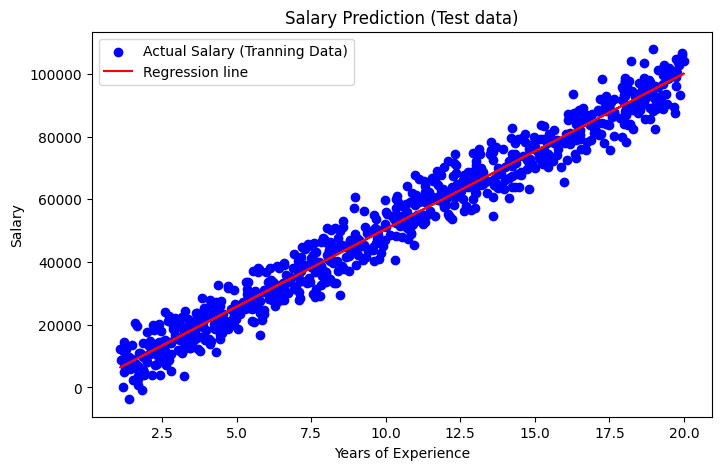

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, color='blue', label='Actual Salary (Tranning Data)')
plt.plot(x_train,model.predict(x_train), color='red',label='Regression line')
plt.title('Salary Prediction (Test data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

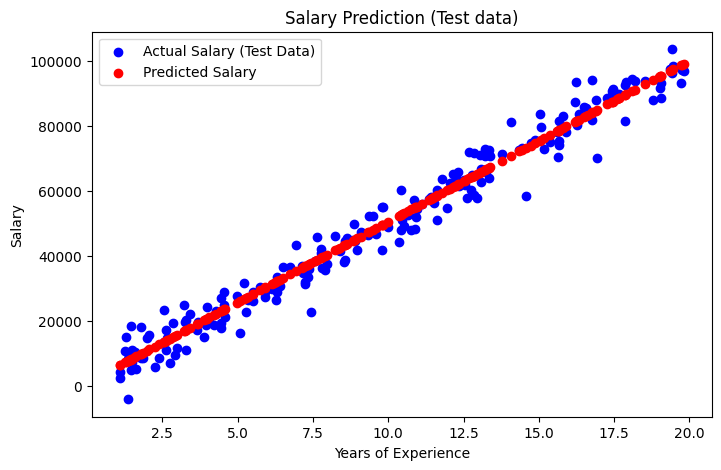

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color='blue', label='Actual Salary (Test Data)')
plt.scatter(x_test, model.predict(x_test), color='red',label='Predicted Salary')
plt.title('Salary Prediction (Test data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [20]:
 mae = mean_absolute_error(y_test, y_pred)
 mse = mean_squared_error(y_test, y_pred)
 r2 = r2_score(y_test, y_pred)
 print(f'Mean Absolute Error (MAE): {mae}')
 print(f'Mean Squared Error (MSE): {mse}')
 print(f'R-squared: {r2}')

Mean Absolute Error (MAE): 3602.3955438952066
Mean Squared Error (MSE): 21434311.66454385
R-squared: 0.9720753738957405


In [27]:
# Predicted Salary Based on User Input
experience = float(input("Enter the number of years of experience: "))
predicted_salary = model.predict([[experience]])[0]
print(f"Predicted Salary for {experience} years of experience: {predicted_salary : .2f}")

Enter the number of years of experience: 2.3
Predicted Salary for 2.3 years of experience:  12389.11


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
